In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df2014 = pd.read_csv('2014_Financial_Data.csv')
df2015 = pd.read_csv('2015_Financial_Data.csv')
df2016 = pd.read_csv('2016_Financial_Data.csv')
df2017 = pd.read_csv('2017_Financial_Data.csv')
df2018 = pd.read_csv('2018_Financial_Data.csv')

In [3]:
df2014 = df2014.rename({'2015 PRICE VAR [%]':'PRICE_VAR'},axis =1)
df2015 = df2015.rename({'2016 PRICE VAR [%]':'PRICE_VAR'},axis =1)
df2016 = df2016.rename({'2017 PRICE VAR [%]':'PRICE_VAR'},axis =1)
df2017 = df2017.rename({'2018 PRICE VAR [%]':'PRICE_VAR'},axis =1)
df2018 = df2018.rename({'2019 PRICE VAR [%]':'PRICE_VAR'},axis =1)

In [4]:
# Adding the Benchmark for each year
df2014['S&P 500'] = -0.0073
df2015['S&P 500'] = 0.0954
df2016['S&P 500'] = 0.1942
df2017['S&P 500'] = -0.0624
df2018['S&P 500'] = 0.2888

In [5]:
print(df2014.shape)
print(df2015.shape)
print(df2016.shape)
print(df2017.shape)
print(df2018.shape)

(3808, 226)
(4120, 226)
(4797, 226)
(4960, 226)
(4392, 226)


In [6]:
df = pd.concat([df2014,df2015,df2016,df2017,df2018])

In [7]:
df['PRICE_VAR']=df['PRICE_VAR']/100

## Übersicht Datenset

In [9]:
df.head(3)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE_VAR,Class,S&P 500
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-0.093233,0,-0.0073
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-0.255122,0,-0.0073
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,0.331183,1,-0.0073


In [ ]:
#Wir sehen unser Feature Sector ist ein String

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22077 entries, 0 to 4391
Columns: 226 entries, Unnamed: 0 to S&P 500
dtypes: float64(223), int64(1), object(2)
memory usage: 38.2+ MB


In [11]:
np.arange(0,22078)

array([    0,     1,     2, ..., 22075, 22076, 22077])

In [12]:
df.index = np.arange(1,22078) 

In [13]:
df

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE_VAR,Class,S&P 500
1,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-0.093233,0,-0.0073
2,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-0.255122,0,-0.0073
3,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,0.331183,1,-0.0073
4,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,0.027523,1,-0.0073
5,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,0.128977,1,-0.0073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22073,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-0.909621,0,0.2888
22074,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-0.779221,0,0.2888
22075,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-0.178344,0,0.2888
22076,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-0.735200,0,0.2888


In [14]:
#Übersicht erhalten über alle Features

for column in df.columns:
    print(column)

Unnamed: 0
Revenue
Revenue Growth
Cost of Revenue
Gross Profit
R&D Expenses
SG&A Expense
Operating Expenses
Operating Income
Interest Expense
Earnings before Tax
Income Tax Expense
Net Income - Non-Controlling int
Net Income - Discontinued ops
Net Income
Preferred Dividends
Net Income Com
EPS
EPS Diluted
Weighted Average Shs Out
Weighted Average Shs Out (Dil)
Dividend per Share
Gross Margin
EBITDA Margin
EBIT Margin
Profit Margin
Free Cash Flow margin
EBITDA
EBIT
Consolidated Income
Earnings Before Tax Margin
Net Profit Margin
Cash and cash equivalents
Short-term investments
Cash and short-term investments
Receivables
Inventories
Total current assets
Property, Plant & Equipment Net
Goodwill and Intangible Assets
Long-term investments
Tax assets
Total non-current assets
Total assets
Payables
Short-term debt
Total current liabilities
Long-term debt
Total debt
Deferred revenue
Tax Liabilities
Deposit Liabilities
Total non-current liabilities
Total liabilities
Other comprehensive income
Re

Unabhängig vom Namen des Unternehmens und Jahr der Daten wollen wir eine Prediction erstellen:

In [15]:
df = df.drop(['Unnamed: 0'], axis=1)

# Datenbereinigung

Wir sehen dass unser Datensatz verschiedene Probleme mit sich bringt die wir genauer anschauen müssen. Folgendes ist uns aufgefallen:
1. Dem Datensatz fehlen einige Daten (Je nach Feature sind es mehr oder weniger die uns fehlen)
2. Wir müssen auf Multikollinearität achten damit es keine Verzerrung ergibt bei unseren Prognosen
3. Es gibt starke Ausreisser in unseren Daten und dies in verschiedenen Spalten (bsp. haben wir ein Unternehmen mit Debt to Equity von -2586.4)
4. Wir müssen fehlende Datenpunkte noch ergänzen durch einen Schätzwert

## 1. Wir untersuchen welche Daten uns fehlen:

* 1 Schritt: Spalten werden analysiert
* 2 Schritt: Zeilen werden analysiert

### 1 Schritt: Untersuchen der Spalten

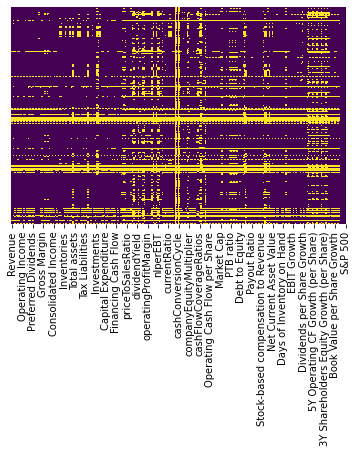

In [16]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [17]:
# Unser Threshhold wieviele Werte unsere Features mindestens mitbringen sollten.
# Wir wollen mindestens 50% der Datenpunkte für unsere Features.

Threshhold = 22077*(0.5)
print('Unsere Untergrenze liegt bei', round(Threshhold, 0), 'Datenpunkten')

Unsere Untergrenze liegt bei 11038.0 Datenpunkten


In [18]:
df = df.dropna(thresh=Threshhold, axis=1)

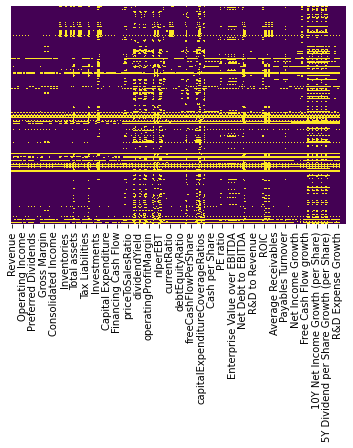

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [20]:
df.shape

(22077, 223)

### 2 Schritt: Untersuchen der Zeilen

In [21]:
# Ebenfalls sehen wir das es Zeilen gibt in denen sehr viele Features fehlen
# Wir wollen für unsere Zeilen mindestens 50% der Features haben, um eine Schätzung durchzuführen
# Also mindestens die Hälfte Features
df = df.dropna(thresh=220*0.5-2)
df.shape

(19807, 223)

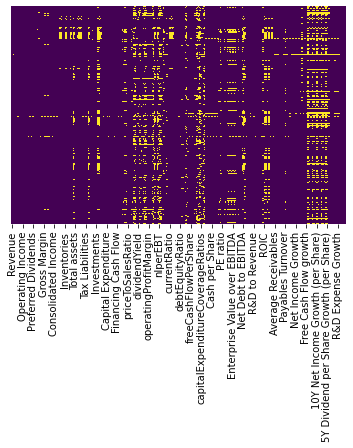

In [22]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

## 2. String in Dummy Variablen ersetzen

Wir werden nach der Bereinigung den String Sector wieder anhängen 

In [27]:
sector = df['Sector'] 


KeyError: 'Sector'

In [28]:
sector

1        Consumer Defensive
2        Consumer Defensive
3        Consumer Defensive
4        Consumer Defensive
5        Consumer Defensive
                ...        
22073           Real Estate
22074       Basic Materials
22075       Basic Materials
22076           Industrials
22077            Healthcare
Name: Sector, Length: 19807, dtype: object

In [29]:
sector_dummies = pd.get_dummies(sector)

In [30]:
sector_dummies

,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
22073,0,0,0,0,0,0,0,0,1,0,0
22074,1,0,0,0,0,0,0,0,0,0,0
22075,1,0,0,0,0,0,0,0,0,0,0
22076,0,0,0,0,0,0,0,1,0,0,0


In [25]:
df=df.drop('Sector', axis=1)

## 3. Ergänzen der fehlenden Datenpunkte

In [ ]:
# Fehlende Datenpunkte ergänzen wir mit dem Median. 
# Dies aufgrund weil wir unseren Datensatz noch nicht für die Ausreisser nach oben bzw nach unten korrigiert haben

In [31]:
df = df.fillna(value=df.median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19807 entries, 1 to 22077
Columns: 222 entries, Revenue to S&P 500
dtypes: float64(221), int64(1)
memory usage: 33.7 MB


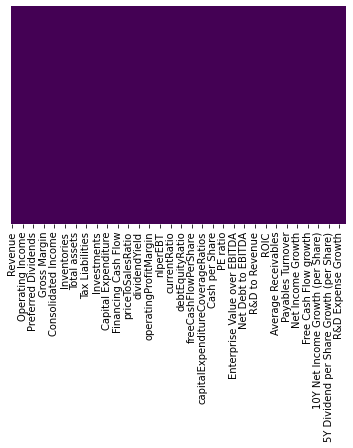

In [32]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

## 4. Entfernen von Aussreisern

Aussreisser in diesem Datensatz müssen bereinigt werden, da diese sonst unsere Prognosen stark verzerren könnten. Die Aufgabenstellung hat auf extremas im 1% - 99% perzentil hingewiesen. Wir führen deshalb folgende Strategie. Datenpunkte in einer Spalte die über bzw unter der zweiten Standardabweichung liegen, entfernen wir. Somit haben wir mit sicherheit diese Extremas entfernt Dabei entfernen wir die ganze Zeile in der dieser Fall vorliegt.

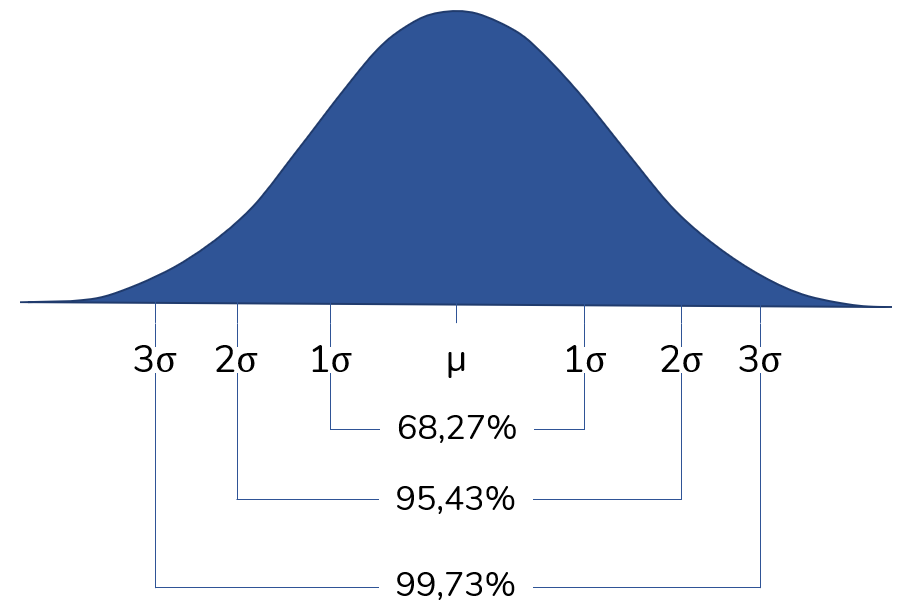

In [34]:
from IPython.display import Image
Image(filename='Normalverteilung.png')

In [35]:
df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE_VAR,Class,S&P 500
1,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,-0.093233,0,-0.0073
2,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0.0098,0.0000,0.0482,0.0324,0.0000,1.6484,1.7313,-0.255122,0,-0.0073
3,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,0.331183,1,-0.0073
4,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,0.027523,1,-0.0073
5,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,0.128977,1,-0.0073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22073,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,-0.909621,0,0.2888
22074,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,-0.779221,0,0.2888
22075,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,-0.178344,0,0.2888
22076,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,-0.735200,0,0.2888


In [36]:
#https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

df = df[np.abs(df-df.mean()) <= (2*df.std())].dropna()

In [63]:
df.shape

(9941, 222)

In [64]:
df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE_VAR,Class,S&P 500
2,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0.0098,0.0000,0.0482,0.0324,0.0000,1.6484,1.7313,-0.255122,0,-0.0073
15,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,0.000000e+00,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,...,0.1295,0.0352,0.0815,-0.0658,0.3515,0.0000,0.0579,0.186038,1,-0.0073
17,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.220000e+08,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,...,0.0551,0.0984,-0.0252,0.3269,-0.0984,-0.0469,-0.0733,0.226288,1,-0.0073
19,9.316256e+09,0.0645,7.751273e+09,1.564983e+09,0.000000e+00,6.509480e+08,6.509480e+08,9.140350e+08,1.270400e+07,9.188030e+08,...,0.1052,0.0894,0.1098,0.0912,0.0000,0.0000,0.0376,0.586668,1,-0.0073
23,4.551600e+09,-0.0210,1.865700e+09,2.685900e+09,0.000000e+00,2.219600e+09,2.660200e+09,2.570000e+07,6.850000e+07,-7.730000e+07,...,0.0676,0.0151,0.0189,-0.4351,0.2522,0.0000,-0.0281,0.266812,1,-0.0073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22070,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.572500e+07,5.269000e+06,2.099400e+07,-2.099400e+07,0.000000e+00,-2.113800e+07,...,0.0000,0.0000,-0.2958,-0.3299,0.0000,-0.4049,-0.3099,2.624272,1,0.2888
22073,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,-0.909621,0,0.2888
22075,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,-0.178344,0,0.2888
22076,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,-0.735200,0,0.2888


In [38]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE_VAR,Class,S&P 500
count,9.941000e+03,9941.000000,9.941000e+03,9.941000e+03,9.941000e+03,9.941000e+03,9.941000e+03,9.941000e+03,9.941000e+03,9.941000e+03,...,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000
mean,1.651660e+09,0.347328,1.043615e+09,6.076339e+08,2.731184e+07,3.067687e+08,4.396498e+08,1.714031e+08,3.599004e+07,1.374165e+08,...,0.386054,0.063289,0.309722,0.197214,0.789761,0.117851,0.175481,0.185123,0.552460,0.103292
std,3.508327e+09,6.822312,2.629094e+09,1.195149e+09,1.020437e+08,7.041819e+08,8.761044e+08,4.655874e+08,8.345761e+07,4.328005e+08,...,4.334159,0.383993,2.125058,2.933708,9.178600,0.680592,0.622026,3.692886,0.497265,0.129384
min,-1.646740e+08,-3.461500,-2.105100e+09,-1.270577e+09,-1.098000e+08,-1.043667e+08,-8.835864e+08,-4.020998e+09,-5.095031e+08,-4.051333e+09,...,-1.000000,-1.000000,-1.000000,-64.500000,-1.000000,-2.662200,-2.369900,-0.999478,0.000000,-0.062400
25%,5.940300e+07,-0.005200,3.284380e+05,3.253100e+07,0.000000e+00,1.693000e+07,3.484700e+07,-5.011000e+06,0.000000e+00,-8.873000e+06,...,-0.033700,0.000000,-0.018000,-0.078100,-0.056100,0.000000,-0.004300,-0.195558,0.000000,-0.007300
50%,3.586320e+08,0.057200,1.120840e+08,1.662940e+08,0.000000e+00,6.682100e+07,1.278420e+08,3.184800e+07,2.117000e+06,2.299100e+07,...,0.007800,0.000000,0.051900,0.032400,0.000000,0.000000,0.062800,0.043776,1.000000,0.095400
75%,1.532000e+09,0.169300,8.200400e+08,5.832000e+08,1.095300e+07,2.496460e+08,4.197000e+08,1.697760e+08,3.220000e+07,1.376010e+08,...,0.180600,0.052800,0.175900,0.120700,0.147600,0.000000,0.186000,0.293479,1.000000,0.194200
max,3.952800e+10,583.500000,3.112300e+10,1.267200e+10,1.520000e+09,7.618000e+09,9.597016e+09,5.097000e+09,8.257455e+08,4.775000e+09,...,185.000000,6.594500,82.904000,104.066700,329.892600,24.300000,18.064500,241.666659,1.000000,0.288800


In [39]:
#Dies hat nicht funktioniert

#from scipy import stats
#z_scores = stats.zscore(df)
#df[(abs(z_scores) < 2).all(axis=1)]
#df

## Ergänzen wir noch unsere Dummy Variablen 

In [67]:
df = df.join(sector_dummies)

In [68]:
df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
2,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0,0,1,0,0,0,0,0,0,0
15,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,0.000000e+00,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,...,0,0,1,0,0,0,0,0,0,0
17,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.220000e+08,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,...,0,0,1,0,0,0,0,0,0,0
19,9.316256e+09,0.0645,7.751273e+09,1.564983e+09,0.000000e+00,6.509480e+08,6.509480e+08,9.140350e+08,1.270400e+07,9.188030e+08,...,0,0,1,0,0,0,0,0,0,0
23,4.551600e+09,-0.0210,1.865700e+09,2.685900e+09,0.000000e+00,2.219600e+09,2.660200e+09,2.570000e+07,6.850000e+07,-7.730000e+07,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22070,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.572500e+07,5.269000e+06,2.099400e+07,-2.099400e+07,0.000000e+00,-2.113800e+07,...,0,0,0,0,0,1,0,0,0,0
22073,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0,0,0,0,0,0,0,1,0,0
22075,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0,0,0,0,0,0,0,0,0,0
22076,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,0,0,0,0,0,0,1,0,0,0


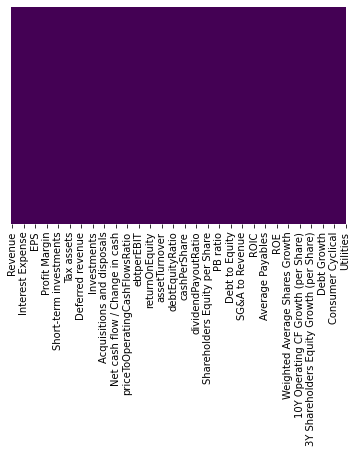

In [69]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

## Nun ergänzen wir noch eine Spalte die uns die Klassifizierung Buy/Hold/Sell gibt

* Buy: Outperformance von mehr als 2.5% im Vergleich zum S&P 500
* Hold: Performance zwischen +/- 2.5% im Vergleich zum S&P 500
* Sell: Underperformance von weniger als 2.5% im Vergleich zum S&P 500

In [70]:
dif = df['PRICE_VAR'] - df['S&P 500']
dif

2       -0.247822
15       0.193338
17       0.233588
19       0.593968
23       0.274112
           ...   
22070    2.335472
22073   -1.198421
22075   -0.467144
22076   -1.024000
22077    1.805822
Length: 9941, dtype: float64

In [71]:
signal = []

for number in dif:
    if number<-0.025:
        signal.append('Sell')
        print('Sell')
    elif number<0.025:
        signal.append('Hold')
        print('Hold')
    else:
        signal.append('Buy')
        print('Buy')

Sell
Buy
Buy
Buy
Buy
Hold
Buy
Hold
Sell
Sell
Buy
Sell
Sell
Buy
Buy
Buy
Sell
Sell
Buy
Sell
Buy
Hold
Sell
Sell
Sell
Sell
Buy
Buy
Buy
Sell
Sell
Sell
Sell
Buy
Buy
Sell
Sell
Sell
Buy
Sell
Buy
Sell
Sell
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Buy
Sell
Buy
Buy
Buy
Sell
Sell
Sell
Sell
Sell
Sell
Buy
Sell
Sell
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Buy
Sell
Buy
Hold
Hold
Sell
Sell
Sell
Sell
Sell
Buy
Sell
Sell
Buy
Buy
Hold
Sell
Sell
Sell
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Hold
Hold
Sell
Buy
Sell
Sell
Sell
Buy
Buy
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Hold
Buy
Sell
Sell
Sell
Sell
Buy
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Buy
Buy
Hold
Hold
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Buy
Sell
Sell
Buy
Buy
Buy
Buy
Buy
Buy
Sell
Sell
Sell
Buy
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Hold
Buy
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Buy
Sell
Buy
Sell
Buy
Sell
Buy
Hold
Sell
Buy
Sell
Sell
Buy
Buy
Buy
Sell
Buy
Sell
Sell


Buy
Sell
Sell
Sell
Buy
Sell
Sell
Hold
Hold
Sell
Sell
Sell
Buy
Buy
Sell
Sell
Sell
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Buy
Sell
Buy
Buy
Buy
Sell
Buy
Sell
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Sell
Buy
Buy
Sell
Buy
Buy
Hold
Buy
Buy
Buy
Sell
Buy
Sell
Sell
Buy
Buy
Buy
Buy
Buy
Sell
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Sell
Buy
Hold
Sell
Sell
Buy
Sell
Buy
Sell
Sell
Buy
Buy
Sell
Buy
Buy
Sell
Sell
Sell
Buy
Buy
Sell
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Sell
Buy
Buy
Buy
Buy
Buy
Sell
Sell
Buy
Buy
Buy
Sell
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Hold
Buy
Sell
Buy
Sell
Buy
Buy
Buy
Buy
Buy
Buy
Sell
Buy
Sell
Buy
Buy
Buy
Sell
Buy
Sell
Sell
Buy
Buy
Buy
Buy
Sell
Buy
Buy
Sell
Sell
Sell
Sell
Sell
Buy
Buy
Buy
Buy
Buy
Sell
Buy
Buy
Buy
Buy
Buy
Sell
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Sell
Buy
Buy
Hold
Sell
Sell
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Sell
Buy
Buy
Buy
Buy
Buy
Buy
Sell
Buy
Sell
Buy
Sell
Buy
Buy
Sell
Buy
Buy
Buy
Hold
Hold
Hold
Buy
Buy
Sell
Buy
Sell
Buy
Buy
Buy
Buy
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Sell
Sell
S

Buy
Sell
Buy
Buy
Buy
Buy
Buy
Buy
Buy
Sell
Sell
Buy
Sell
Sell
Sell
Hold
Buy
Sell
Sell
Buy
Sell
Sell
Sell
Sell
Buy
Sell
Sell
Buy
Sell
Sell
Sell
Buy
Sell
Hold
Sell
Sell
Buy
Sell
Sell
Sell
Buy
Buy
Sell
Sell
Sell
Sell
Sell
Hold
Sell
Buy
Buy
Buy
Sell
Buy
Sell
Buy
Hold
Sell
Buy
Sell
Sell
Buy
Sell
Sell
Sell
Sell
Buy
Sell
Buy
Buy
Buy
Buy
Sell
Buy
Buy
Sell
Buy
Buy
Sell
Sell
Sell
Sell
Buy
Sell
Buy
Sell
Buy
Buy
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Buy
Buy
Buy
Buy
Sell
Sell
Buy
Buy
Buy
Sell
Sell
Buy
Sell
Buy
Sell
Buy
Sell
Buy
Sell
Buy
Sell
Buy
Buy
Buy
Buy
Sell
Hold
Buy
Sell
Sell
Buy
Buy
Sell
Sell
Buy
Hold
Sell
Sell
Hold
Sell
Hold
Buy
Sell
Sell
Sell
Buy
Buy
Hold
Hold
Sell
Buy
Sell
Sell
Buy
Sell
Buy
Buy
Buy
Buy
Buy
Sell
Buy
Buy
Sell
Buy
Sell
Sell
Sell
Buy
Sell
Sell
Sell
Buy
Buy
Buy
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Buy
Sell
Hold
Sell
Buy
Buy
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Sell
Buy
Sell
Buy
Sell
Hold
Buy
Hold
Hold
Sell
Sell
Sell
Sell
Sell
Sell
Buy
Buy
Sell
Sell
Hold
Sell
Buy
Buy
Buy
Buy
Sell
Sell
Sel

Hold
Sell
Sell
Sell
Sell
Hold
Buy
Hold
Sell
Sell
Hold
Sell
Buy
Buy
Hold
Buy
Sell
Sell
Buy
Sell
Sell
Hold
Sell
Sell
Buy
Sell
Buy
Sell
Sell
Buy
Sell
Sell
Sell
Sell
Buy
Sell
Buy
Hold
Buy
Sell
Sell
Sell
Buy
Buy
Hold
Sell
Sell
Sell
Sell
Buy
Buy
Buy
Sell
Sell
Buy
Hold
Sell
Hold
Sell
Sell
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Buy
Buy
Sell
Sell
Sell
Sell
Buy
Sell
Buy
Sell
Sell
Hold
Sell
Sell
Sell
Buy
Hold
Buy
Buy
Sell
Buy
Sell
Sell
Hold
Buy
Hold
Sell
Hold
Sell
Buy
Buy
Sell
Buy
Sell
Hold
Hold
Buy
Sell
Sell
Buy
Hold
Sell
Buy
Buy
Hold
Sell
Buy
Sell
Buy
Buy
Sell
Buy
Sell
Buy
Sell
Sell
Sell
Sell
Sell
Sell
Hold
Buy
Sell
Sell
Buy
Buy
Sell
Sell
Sell
Sell
Sell
Hold
Sell
Buy
Hold
Sell
Hold
Sell
Buy
Sell
Hold
Buy
Sell
Hold
Hold
Buy
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Buy
Sell
Hold
Buy
Buy
Sell
Sell
Sell
Sell
Sell
Buy
Sell
Buy
Sell
Sell
Buy
Sell
Buy
Buy
Buy
Sell
Hold
Sell
Sell
Sell
Hold
Buy
Buy
Buy
Buy
Hold
Sell
Buy
Buy
Sell
Sell
Sell
Sell
Buy
Hold
Buy
Sell
Sell
Buy
Buy
Buy
Sell
Sell
Hold
Sell
Sell
S

In [72]:
df['Signal']= signal

In [73]:
df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Signal
2,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0,1,0,0,0,0,0,0,0,Sell
15,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,0.000000e+00,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,...,0,1,0,0,0,0,0,0,0,Buy
17,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.220000e+08,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,...,0,1,0,0,0,0,0,0,0,Buy
19,9.316256e+09,0.0645,7.751273e+09,1.564983e+09,0.000000e+00,6.509480e+08,6.509480e+08,9.140350e+08,1.270400e+07,9.188030e+08,...,0,1,0,0,0,0,0,0,0,Buy
23,4.551600e+09,-0.0210,1.865700e+09,2.685900e+09,0.000000e+00,2.219600e+09,2.660200e+09,2.570000e+07,6.850000e+07,-7.730000e+07,...,0,1,0,0,0,0,0,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22070,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.572500e+07,5.269000e+06,2.099400e+07,-2.099400e+07,0.000000e+00,-2.113800e+07,...,0,0,0,0,1,0,0,0,0,Buy
22073,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0,0,0,0,0,0,1,0,0,Sell
22075,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0,0,0,0,0,0,0,0,0,Sell
22076,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,0,0,0,0,0,1,0,0,0,Sell
